/Users/soukhind/anaconda3/envs/newbrain/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


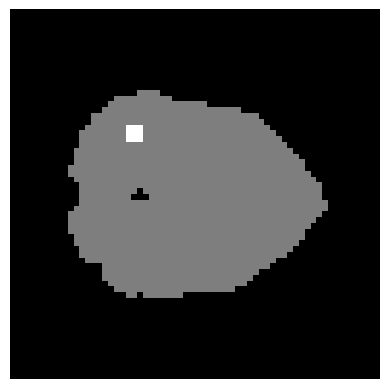

In [3]:
import loadvolume
from tools import plotfs
import time
lv = loadvolume.loadvolume('/Users/soukhind/Desktop/Participant_03_rest_run02.nii')

lv.loaddata()
lv.loadmask()
lv.generate_noise()
lv.generate_region()

In [89]:

maxp1 = 0
maxp2 = 0
#%%

import design
import numpy as np
from scipy.integrate import quad,simps
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import importlib as imp
import matplotlib.pyplot as plt
#%matplotlib qt
p1 = np.zeros((20,20))
p2 = np.zeros((20,20))
import importlib
importlib.reload(design)
k = 0
paradigm = 'attn'
cue_ratio = 1
dist = 'exp'
start = time.time()
store = 1
jit = 1
for lisi in np.arange(1,21,1):
    l = 0
    for uisi in np.arange(1,21,1):
        if lisi > uisi:
            l += 1
            continue
        if paradigm:
            arg_map = paradigm + 'map'
        else:
            arg_map = None
            
        d = design.expdesign(lisi, uisi, 0.1, 100, [2], lv, dist,None,
                             cue_ratio,noise = False,nonlinear = True,load = arg_map)
        w = d.create_jitter()
        
        data = d.tcourse()
        
        e = design.expanalyse(data, np.array([1, 0]), expdesign = d)
        p1[k,l] = e.calc_Fd()
        p2[k,l] = e.calc_Fe(ncond =2)
        if store:
            if lisi == 2 and uisi == 3:
                e1 = e.roi
                t1 = cue_ratio*e.design[:,0] + e.design[:,1]
            if lisi == 5 and uisi == 9:
                e2 = e.roi
                t2 = cue_ratio*e.design[:,0] + e.design[:,1]
            if lisi == 2 and uisi == 19:
                e3 = e.roi
                t3 = cue_ratio*e.design[:,0] + e.design[:,1]
            if lisi == 18 and uisi == 19:
                e4 = e.roi
                t4 = cue_ratio*e.design[:,0] + e.design[:,1]
            if lisi == 2 and uisi == 10:
                e5 = e.roi
                t5 = cue_ratio*e.design[:,0] + e.design[:,1]
        
        l += 1
    k += 1
    
print(f'Time: {time.time() - start}')

Time: 12.142800092697144


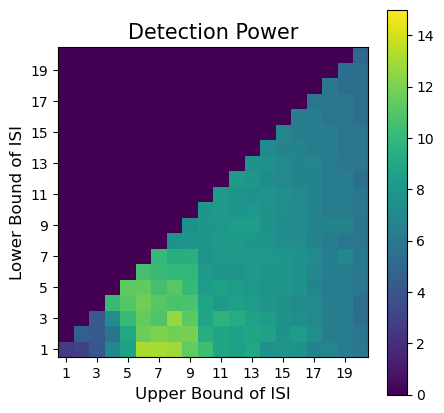

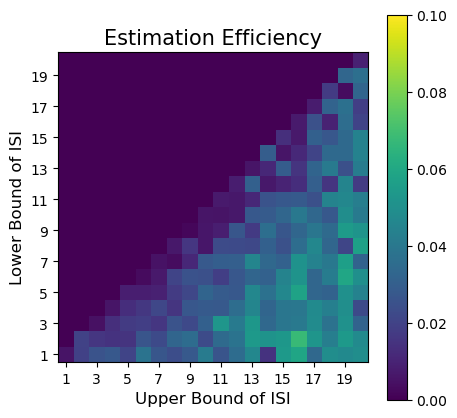

In [90]:
importlib.reload(plotfs)
fig1,fig2 = plotfs.plotdata(p1,p2,15,0.1)
#fig1.savefig('dt_attnmap_sub_imp_0.8' + '.jpg',bbox_inches='tight',dpi=300)
#fig2.savefig('est_attnmap_sub_imp_0.8'+ '.jpg',bbox_inches='tight',dpi=300)
#

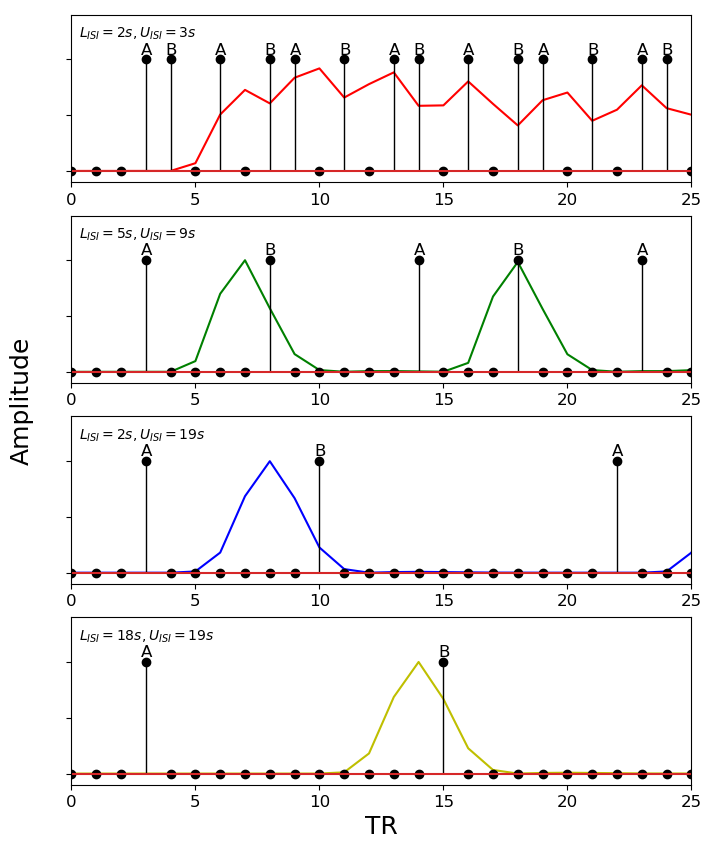

In [239]:

from matplotlib import pyplot as plt
import numpy as np

#%% Data reformatting

def remove_transient(x):
    for i in range(0,len(x)):
        if x[i] == 0.66:
            x[i] = 0
    return x
            
e1 = e1/np.max(e1)
e2 = e2/np.max(e2)
e3 = e3/np.max(e3)
e4 = e4/np.max(e4)
e5 = e5/np.max(e5)

t1 = remove_transient(t1)
t2 = remove_transient(t2)
t3 = remove_transient(t3)
t4 = remove_transient(t4)
t5 = remove_transient(t5)

fig = plt.figure(figsize = (8,10))

mainax = fig.add_subplot(111)
mainax.spines['top'].set_color('none')
mainax.spines['bottom'].set_color('none')
mainax.spines['left'].set_color('none')
mainax.spines['right'].set_color('none')
mainax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax = fig.add_subplot(411)
plt.plot(e1,color = 'r')
plt.xlim(0,25)
plt.ylim(-0.1,1.4)
(markers, stemlines, baseline) = plt.stem(t1)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,25,6),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,25):
    if t1[i] == cue_ratio and f == 1:
        ax.text(i - 0.2 , cue_ratio + 0.05,'A',fontsize = 12)
        f = 0
    elif t1[i] == 1 and f == 0:        
        ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
        f = 1
ax.text(0.3,1.2,'$L_{ISI} = 2s,U_{ISI} = 3s$',fontsize = 10)


ax = fig.add_subplot(412)
plt.plot(e2,color = 'g')
plt.xlim(0,25)
plt.ylim(-0.1,1.4)
(markers, stemlines, baseline) = plt.stem(t2)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,25,6),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,25):
    if t2[i] == cue_ratio and f == 1:
        ax.text(i - 0.2 , cue_ratio + 0.05,'A',fontsize = 12)
        f = 0
    elif t2[i] == 1 and f == 0:        
        ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
        f = 1
ax.text(0.3,1.2,'$L_{ISI} = 5s,U_{ISI} = 9s$',fontsize = 10)



ax = fig.add_subplot(413)
plt.plot(e3,color = 'b')
plt.xlim(0,25)
plt.ylim(-0.1,1.4)
(markers, stemlines, baseline) = plt.stem(t3)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,25,6),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,25):
    if t3[i] == cue_ratio and f == 1:
        ax.text(i - 0.2 , cue_ratio + 0.05,'A',fontsize = 12)
        f = 0
    elif t3[i] == 1 and f == 0:        
        ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
        f = 1
ax.text(0.3,1.2,'$L_{ISI} = 2s,U_{ISI} = 19s$',fontsize = 10)


ax = fig.add_subplot(414)
plt.plot(e4,color = 'y')
plt.xlim(0,25)
plt.ylim(-0.1,1.4)
(markers, stemlines, baseline) = plt.stem(t4)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,25,6),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,25):
    if t4[i] == cue_ratio and f == 1:
        ax.text(i - 0.2 , cue_ratio + 0.05,'A',fontsize = 12)
        f = 0
    elif t4[i] == 1 and f == 0:        
        ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
        f = 1
ax.text(0.3,1.2,'$L_{ISI} = 18s,U_{ISI} = 19s$',fontsize = 10)
 



mainax.set_xlabel('TR',fontsize = 18)
mainax.set_ylabel('Amplitude', fontsize = 18)
plt.subplots_adjust(wspace=0.1, hspace=0.2)
fig.savefig('timecourses_cue_r_' + str(cue_ratio) + '.jpg',bbox_inches='tight',dpi=300)


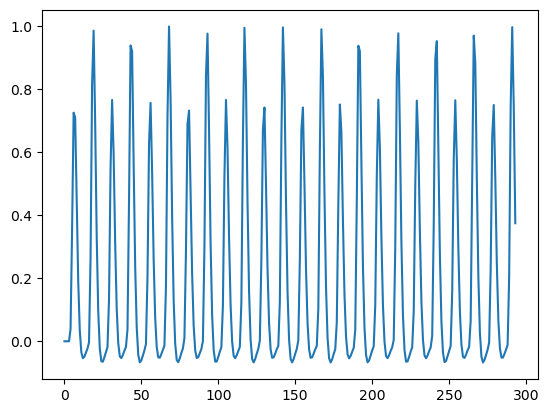

In [165]:

#fig.savefig("timecourses",dpi = 600,bbox_inches = 'tight',pad_inches = 0.1)
#%% Simple HRF plot

from tools._dghrf import _dghrf
plt.figure(figsize = (3,3))
hrf = _dghrf()
plt.plot(hrf)
plt.xticks(np.arange(0,33,3),labels = [0,2,4,6,8,12,16,18,20,22,24],fontsize = 12)
plt.yticks([0,0.5,1],'')
plt.ylim(-0.15,1.2)
plt.xlim(0,30)
plt.axhline(0, color='red',lw = 1)
plt.title('Underlying HRF Response',fontsize = 15)
plt.xlabel('TR',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)

#%% Best timecourse plot

fig = plt.figure(figsize = (20,2.5))

ax = fig.add_subplot(111)
plt.plot(e5,color = 'coral')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t5)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t1[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1
plt.xlabel('TR',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
fig.savefig("timecourses_recommend",dpi = 600,bbox_inches = 'tight',pad_inches = 0.1)